In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [2]:
centers=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=None, usecols=(1,2,3))
labels=np.genfromtxt("../../Data/connectivity_matrix/centres.txt",dtype=str, usecols=(0))


In [3]:
centers=centers.transpose()


In [4]:
centers[:,1]-centers[:,1], centers.shape

(array([0., 0., 0.]), (3, 66))

In [5]:
x66=(centers[0].max()+centers[0].min())/2.0
y66=(centers[1].max()+centers[1].min())/2.0
z66=(centers[2].max()+centers[2].min())/2.0
cen=[x66,y66,z66]

In [6]:
W66 = np.loadtxt("../../Data/connectivity_matrix/weights.txt")
np.fill_diagonal(W66, 0)

In [7]:
G=nx.from_numpy_matrix(W66)

In [8]:
edge_xyz=np.array([(centers[:,u]-cen, centers[:,v]-cen) for u, v in G.edges()])

In [9]:
node_xyz=np.array([centers[:,v]-cen for v in sorted(G)])

In [10]:
widths=np.array([W66[u,v] for u,v in G.edges()])

In [11]:
diff=widths.max()- widths.min()
def line_width(w, w_min,diff,f, t):
    p=(w-w_min)/diff
    if p>=t:
        return p*f
    else:
        return 0

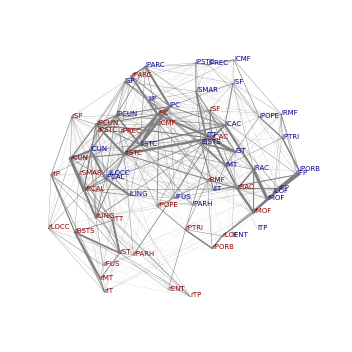

In [12]:
from mpl_toolkits.mplot3d import axes3d

# Create the 3D figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
#ax.scatter(*node_xyz.T, s=0, ec="w")


# Plot the edges
for i,vizedge in enumerate(edge_xyz):
    ax.plot(*vizedge.T, color="tab:gray", 
            linewidth=line_width(widths[i],widths.min(), widths.max()-widths.min(), 4, 0.0))
    
for i,label in enumerate(labels[0:33]):
    ax.text(centers[0,i]-x66,centers[1,i]-y66,centers[2,i]-z66, label, size=7, c='darkred')
for i,label in enumerate(labels[33:]):
    ax.text(centers[0,i+33]-x66,centers[1,i+33]-y66,centers[2,i+33]-z66, label, size=7, c='darkblue')

def _format_axes(ax):
    ax.set_xlim3d(centers[0].min()+10-x66, centers[0].max()-10-x66)
    ax.set_ylim3d(centers[1].min()+10-y66, centers[1].max()-10-y66)
    ax.set_zlim3d(centers[2].min()+10-z66, centers[2].max()-10-z66)

_format_axes(ax)
ax.axis('off')
fig.tight_layout()
plt.show()
ax.autoscale(tight=True) 
ax.view_init(elev=0, azim=0)
plt.show()

def rotate(angle):
     ax.view_init(azim=angle)

#angle = 0.5
#ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=60)
#ani.save('connectome_22.gif', writer=animation.PillowWriter(fps=10), dpi=200, savefig_kwargs={'bbox_inches':0.5, 'pad_inches':0})

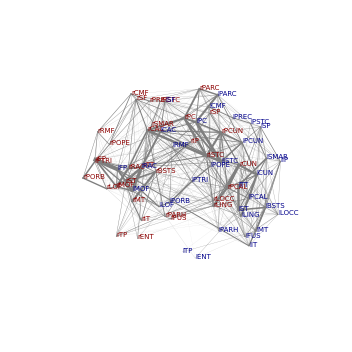

In [24]:
# Create the 3D figure
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
#ax.scatter(*node_xyz.T, s=0, ec="w")


# Plot the edges
for i,vizedge in enumerate(edge_xyz):
    ax.plot(*vizedge.T, color="tab:gray", 
            linewidth=line_width(widths[i],widths.min(), widths.max()-widths.min(), 4, 0.0))
    
for i,label in enumerate(labels[0:33]):
    ax.text(centers[0,i]-x66,centers[1,i]-y66,centers[2,i]-z66, label, size=7, c='darkred')
for i,label in enumerate(labels[33:]):
    ax.text(centers[0,i+33]-x66,centers[1,i+33]-y66,centers[2,i+33]-z66, label, size=7, c='darkblue')

def _format_axes(ax):
    ax.set_xlim3d(centers[0].min()+10-x66, centers[0].max()-10-x66)
    ax.set_ylim3d(centers[1].min()+10-y66, centers[1].max()-10-y66)
    ax.set_zlim3d(centers[2].min()+10-z66, centers[2].max()-10-z66)

_format_axes(ax)
ax.axis('off')
fig.tight_layout()
ax.autoscale(tight=True) 
ax.view_init(elev=40, azim=0)
for ii in np.arange(0,360,1):
    if ii==50:
        ax.view_init(elev=10., azim=ii)
        plt.savefig("../../FigurePowerPoint/movie%d.png" % ii, dpi=200, bbox_inches='tight')

In [14]:
(centers[0].min()-x66, centers[0].max()-x66),(centers[1].min()-y66, centers[1].max()-y66),(centers[2].min()-z66, centers[2].max()-z66)

((-75.9981465, 75.9981465),
 (-54.3585585, 54.3585585),
 (-42.045508000000005, 42.045508))